# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [127]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import PathPatch

import seaborn as sns
import re
import scipy.stats as stats
from numpy.random import randn

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

##### SAT 2017

In [7]:
sat_2017.shape

(51, 5)

In [8]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [10]:
sat_2017['State'].sort_values().tolist()

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [11]:
# Participation should be of float datatype, but is currently an object datatype
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [13]:
# No null values observed
sat_2017.isna().sum(axis=0)

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

### ACT 2017

In [14]:
# ACT 2017 dataset seems to have one more row than the SAT 2017 dataset
act_2017.shape

(52, 7)

In [15]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [16]:
act_2017['State'].sort_values().tolist()

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'National',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [17]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [18]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [19]:
act_2017.isna().sum(axis=0)

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 4a. Does the data look complete? 

Answer: The data is complete as far as non-null values are concerned.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [20]:
%%html
<style>
table {float:left}
</style>

Answer:  

**SAT**  

| | Evidence-Based Reading and Writing | Math | Total 
:--- | :--- | :-- | :-- 
**Minimum** | 200 | 200 | 400
**Maximum** | 800 | 800 | 1600

**ACT**  

| | English | Math | Reading | Science | Composite |
| :--- | :--- | :-- | :-- | :-- | :-- |
| Minimum | 1 | 1 | 1 | 1 | 1 |
| Maximum | 36 | 36 | 36 | 36 | 36 |

In [21]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


The minimum value for the Math section of the SAT 2017 results does not fall within the possible range of values for the Math section.

In [22]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


The minimum value of the Science section of the ACT 2017 results falls within the possible range of values for the Science section but seems to vary from the what should be a reasonable average value.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [23]:
sat_2017[sat_2017['Math'] == sat_2017['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Reference: [SAT Suite of Assessments Annual Report 2017 - Maryland](https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf)

In [24]:
sat_2017.loc[sat_2017['Math'] == sat_2017['Math'].min(), 'Math'] = 524

In [25]:
# Some rows don't seem to have their columns add up
# sat_2017[sat_2017['Evidence-Based Reading and Writing'] + sat_2017['Math'] != sat_2017['Total']]

In [26]:
act_2017[act_2017['Science'] == act_2017['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [27]:
act_2017[act_2017['State'] == 'Maryland']['Science']

21    2.3
Name: Science, dtype: float64

In [28]:
act_2017.loc[act_2017['Science'] == act_2017['Science'].min(), 'Science'] = 23.2

For the abovementioned states, the sum of the scores for evidence-based reading and writing and math do not tally with the total in the dataset, as well as in the reports available on the webpage.

In [29]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [30]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  
* For 2017 SAT, the variable Participation is of type object when it should be a float.
* For 2017 ACT, the variables Participation and Composite are of type object when they should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [31]:
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda x: float(x[:-1])/100)

**Find within SAT 2017 dataset whether there are entries whose participation rate do not fall within 0 and 1 inclusive.**

In [32]:
sat_2017[~((sat_2017['Participation'] >= 0) & (sat_2017['Participation'] <= 1))]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [34]:
act_2017['Participation'] = act_2017['Participation'].map(lambda x: float(x.replace('%', ''))/100)

In [35]:
act_2017['Participation'].head()

0    0.60
1    1.00
2    0.65
3    0.62
4    1.00
Name: Participation, dtype: float64

**Find within ACT 2017 dataset whether there are entries whose participation rate do not fall within 0 and 1 inclusive.**

In [36]:
act_2017[~((act_2017['Participation'] >= 0) & (act_2017['Participation'] <= 1))]

,State,Participation,English,Math,Reading,Science,Composite


- Fix any individual values preventing other columns from being the appropriate type.

**Change column State from object to category**

SAT

In [37]:
sat_2017['State'] = sat_2017['State'].astype('category')

ACT

In [38]:
act_2017['State'] = act_2017['State'].astype('category')

**Change column Composite from object to float**

In [41]:
indexes_with_error = []

for idx, value in enumerate(act_2017['Composite']):
    try:
        float(value)
    except:
        indexes_with_error.append(idx)

act_2017.iloc[indexes_with_error]['Composite']

51    20.2x
Name: Composite, dtype: object

In [42]:
act_2017_composite = act_2017['Composite'].copy()

act_2017_composite.iloc[indexes_with_error] = act_2017_composite.iloc[indexes_with_error].apply(lambda x: x.replace('x', ''))

act_2017_composite.iloc[indexes_with_error]

51    20.2
Name: Composite, dtype: object

In [43]:
act_2017_composite = act_2017_composite.apply(lambda x: float(x))

In [44]:
act_2017['Composite'] = act_2017_composite

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [45]:
act_2017.dtypes

State            category
Participation     float64
English           float64
Math              float64
Reading           float64
Science           float64
Composite         float64
dtype: object

In [46]:
sat_2017.dtypes

State                                 category
Participation                          float64
Evidence-Based Reading and Writing       int64
Math                                     int64
Total                                    int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

**ACT**

In [47]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [48]:
# act_2017.rename(lambda col: "act_2017_{}".format(col.lower()), axis=1).head(5)

In [49]:
act_columns_dict = {
    "State": "state",
    "Participation": "act_2017_participation",
    "English": "act_2017_english",
    "Math": "act_2017_math",
    "Reading": "act_2017_reading",
    "Science": "act_2017_science",
    "Composite": "act_2017_composite"
}
act_2017.rename(act_columns_dict, axis='columns', inplace=True)

**SAT**

In [50]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [51]:
sat_columns_dict = {
    "State": "state",
    "Participation": "sat_2017_participation",
    "Evidence-Based Reading and Writing": "sat_2017_ebrw",
    "Math": "sat_2017_math",
    "Total": "sat_2017_total"
}

sat_2017.rename(sat_columns_dict, axis='columns', inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**state**|*category*|ACT/SAT 2017/2018|One of the states in America|
|**act_participation_201\(7\|8\)**|*float*|ACT 2017/2018|Participation rate (real number from 0 to 1 in two decimal places, i.e. $\mathbb{R} \in [0,1]$)|
|**act_english_201\(7\|8\)**|*float*|ACT 2017/2018|Score for the ACT's English section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{R} \in [1,36]$)|
|**act_math_201\(7\|8\)**|*float*|ACT 2017/2018|Score for the ACT's Math section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{R} \in [1,36]$) |
|**act_reading_201\(7\|8\)**|*float*|ACT 2017/2018|Score for the ACT's Reading section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{R} \in [1,36]$) |
|**act_science_201\(7\|8\)**|*float*|ACT 2017/2018|Score for the ACT's Science section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{R} \in [1,36]$) |
|**act_composite_201\(7\|8\)**|*float*|ACT 2017/2018|Score for the ACT's Composite section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{R} \in [1,36]$) |
|**sat_participation_201\(7\|8\)**|*float*|SAT 2017/2018|Participation rate (real number from 0 to 1 in two decimal places, i.e. $\mathbb{R} \in [0,1]$) |
|**sat_ebrw_201\(7\|8\)**|*float*|SAT 2017/2018|Score for the SAT's Evidence-Based Reading and Writing section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{Z} \in [200,800]$) |
|**sat_math_201\(7\|8\)**|*float*|SAT 2017/2018|Score for the SAT's Math section (real number from 1 to 36 in two decimal places, i.e. $\mathbb{Z} \in [200,800]$) |
|**sat_total_201\(7\|8\)**|*float*|SAT 2017/2018|Score for the SAT's Total (real number from 1 to 36 in two decimal places, i.e. $\mathbb{Z} \in [400,1600]$) |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [52]:
#code
act_2017[act_2017.duplicated()]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite


In [53]:
# act_2017['state'].value_counts().sort_index()

In [54]:
act_2017.drop(act_2017[act_2017['state'] == 'National'].index, inplace=True)

In [55]:
act_2017.reset_index(drop=True, inplace=True)

In [56]:
sat_2017[sat_2017.duplicated()]

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total


In [57]:
# sat_2017['state'].value_counts().sort_index()

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [58]:
combined_2017 = act_2017.merge(sat_2017, on='state')

In [59]:
combined_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [60]:
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [61]:
act_2018 = pd.read_csv("../data/act_2018.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

**ACT 2018**

In [62]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [63]:
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [64]:
act_2018.shape

(51, 7)

Rename column headers

In [65]:
act_columns_dict = {
    "State": "state",
    "Percentage of Students Tested": "act_2018_participation",
    "Average Composite Score": "act_2018_composite",
    "Average English Score": "act_2018_english",
    "Average Math Score": "act_2018_math",
    "Average Reading Score": "act_2018_reading",
    "Average Science Score": "act_2018_science"
}

act_2018.rename(act_columns_dict, axis='columns', inplace=True)

In [66]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                     51 non-null object
act_2018_participation    51 non-null int64
act_2018_composite        51 non-null float64
act_2018_english          51 non-null float64
act_2018_math             51 non-null float64
act_2018_reading          51 non-null float64
act_2018_science          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [67]:
act_2018['state'] = act_2018['state'].astype('category')

All columns except participation fall within the range of values stipulated by the examination board.

In [68]:
# Convert participation rate from integer to float which falls within 0 and 1 inclusive
act_2018['act_2018_participation'] = act_2018['act_2018_participation'].apply(lambda x: x/100)

In [69]:
# Check if the participation rate falls within 0 and 1 inclusive; somewhat unnecessary since describe is used
act_2018[~((act_2018['act_2018_participation'] >= 0) & (act_2018['act_2018_participation'] <=1))]

,state,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science


In [70]:
act_2018.describe()

,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [71]:
act_2018.isnull().sum()

state                     0
act_2018_participation    0
act_2018_composite        0
act_2018_english          0
act_2018_math             0
act_2018_reading          0
act_2018_science          0
dtype: int64

**SAT 2018**

In [72]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [73]:
sat_2018.shape

(51, 5)

Replace column names with more specific names

In [74]:
sat_columns_dict = {
    'State': 'state',
    'Participation': 'sat_2018_participation',
    'Evidence-Based Reading and Writing': 'sat_2018_ebrw',
    'Math': 'sat_2018_math',
    'Total': 'sat_2018_total'
}

sat_2018.rename(sat_columns_dict, axis='columns', inplace=True)

In [75]:
sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_ebrw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [76]:
sat_2018['sat_2018_participation'] = sat_2018['sat_2018_participation'].map(lambda x: float(x.replace('%', ''))/100)

Convert any remaining column's data type to an appropriate data type if necessary

In [77]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                     51 non-null object
sat_2018_participation    51 non-null float64
sat_2018_ebrw             51 non-null int64
sat_2018_math             51 non-null int64
sat_2018_total            51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [78]:
sat_2018['state'] = sat_2018['state'].astype('category')

Check if the minimum and maximum values for each column fall within the possible range of values

In [79]:
sat_2018.describe()

,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608
std,0.373143,47.502627,47.772623,94.155083
min,0.020000,480.000000,480.000000,977.000000
25%,0.045000,534.500000,522.500000,1057.500000
50%,0.520000,552.000000,544.000000,1098.000000
75%,0.775000,610.500000,593.500000,1204.000000
max,1.000000,643.000000,655.000000,1298.000000


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [80]:
act_2018.columns

Index(['state', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science'],
      dtype='object')

In [81]:
sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_ebrw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [82]:
combined_2018 = act_2018.merge(sat_2018, on='state')

In [83]:
combined_2018.head()

,state,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595,571,1166
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562,544,1106
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592,576,1169
4,California,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540,536,1076


In [84]:
final = combined_2017.merge(combined_2018, on='state')

In [85]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540,536,1076


In [86]:
final.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science', 'sat_2018_participation', 'sat_2018_ebrw',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

In [87]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [88]:
#Code:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [89]:
#code
def get_standard_deviation(column):
    n = np.size(column)
    mu = np.mean(column)
#     return ((1/n) * (column - mu)**2)**(1/2)
    return ((1/n) * np.sum((column - mu)**2))**(1/2)
#     return (column - mu)**2

In [90]:
final.select_dtypes(include=['float64', 'int64']);

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [91]:
#Code:
final_numeric = final.select_dtypes(include=['float64', 'int64'])

In [92]:
{col: get_standard_deviation(final[col]) for col in final if (final[col].dtype == 'float64') or (final[col].dtype == 'int64')}

{'act_2017_participation': 0.31824175751231804,
 'act_2017_english': 2.3304876369363368,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.046902931484265,
 'act_2017_science': 1.7222161451443672,
 'act_2017_composite': 2.0007860815819893,
 'sat_2017_participation': 0.3492907076664507,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485504,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 0.3374519488199751,
 'act_2018_composite': 2.0855261815801143,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.0157072555557174,
 'act_2018_reading': 2.1458918845104216,
 'act_2018_science': 1.8516885484833538,
 'sat_2018_participation': 0.3694661922353941,
 'sat_2018_ebrw': 47.03460978357609,
 'sat_2018_math': 47.30194550378353,
 'sat_2018_total': 93.22742384464432}

In [93]:
{col: np.std(final[col]) for col in final if (final[col].dtype == 'float64') or (final[col].dtype == 'int64')}

{'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 0.3492907076664507,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_ebrw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The values of the standard deviations obtained by manual calculation are slightly less than that obtained from pandas `describe` but matches with numpy's `std`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

<table>
    <thead>
        <tr >
            <th colspan=5 style="text-align: center;">Mean Participation Rates</th>
        </tr>
        <tr>
            <th>Test</th>
            <th>Year</th>
            <th>Highest/Lowest</th>
            <th>Value</th>
            <th>Countries</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=4>SAT</td>
            <td rowspan=2>2017</td>
            <td>Highest</td>
            <td>100%</td>
            <td>Connecticut, Delaware, District of Columbia, Michigan</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>2%</td>
            <td>Iowa, Mississippi, North Dakota</td>
        </tr>
        <tr>
            <td rowspan=2>2018</td>
            <td>Highest</td>
            <td>100%</td>
            <td>Colorado, Connecticut, Delaware, Idaho, Michigan</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>2%</td>
            <td>North Dakota</td>
        </tr>
        <!-- -->
        <tr>
            <td rowspan=4>ACT</td>
            <td rowspan=2>2017</td>
            <td>Highest</td>
            <td>100%</td>
            <td>Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>8%</td>
            <td>Maine</td>
        </tr>
        <tr>
            <td rowspan=2>2018</td>
            <td>Highest</td>
            <td>100%</td>
            <td>Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>7%</td>
            <td>Maine</td>
        </tr>
    </tbody>
</table>

SAT Highest for 2 years running: Connecticut, Delaware, Michigan  
SAT Lowest for 2 years running: North Dakota  

ACT Highest for 2 years running: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming  
ACT Lowest for 2 years running: Maine

<table style="float:left">
    <thead>
        <tr >
            <th colspan=5 style="text-align: center;">Mean Total/Composite Scores</th>
        </tr>
        <tr>
            <th>Test</th>
            <th>Year</th>
            <th>Highest/Lowest</th>
            <th>Value</th>
            <th>Countries</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=4>SAT</td>
            <td rowspan=2>2017</td>
            <td>Highest</td>
            <td>1295</td>
            <td>Minnesota</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>950</td>
            <td>District of Columbia</td>
        </tr>
        <tr>
            <td rowspan=2>2018</td>
            <td>Highest</td>
            <td>1298</td>
            <td>Minnesota</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>977</td>
            <td>District of Columbia</td>
        </tr>
        <!-- -->
        <tr>
            <td rowspan=4>ACT</td>
            <td rowspan=2>2017</td>
            <td>Highest</td>
            <td>25.5</td>
            <td>New Hampshire</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>17.8</td>
            <td>Nevada</td>
        </tr>
        <tr>
            <td rowspan=2>2018</td>
            <td>Highest</td>
            <td>25.6</td>
            <td>Connecticut</td>
        </tr>
        <tr>
            <td>Lowest</td>
            <td>17.7</td>
            <td>Nevada</td>
        </tr>
    </tbody>
</table>

Minnesota has the highest total score for the SAT for both 2017 and 2018.  
District of Columbia has the lowest total score for the SAT for both 2017 and 2018.

Nevada has the lowest composite score for the ACT for both 2017 and 2018.

##### highest and lowest participation rates

In [94]:
# 2017 SAT lowest participation rate
final.loc[final['sat_2017_participation'] == final['sat_2017_participation'].min(), ['state', 'sat_2017_participation']]

,state,sat_2017_participation
15,Iowa,0.02
24,Mississippi,0.02
34,North Dakota,0.02


2017 SAT lowest participation rate: Iowa, Mississippi, North Dakota

In [95]:
# 2017 SAT highest participation rate
final.loc[final['sat_2017_participation'] == final['sat_2017_participation'].max(), ['state', 'sat_2017_participation']]

,state,sat_2017_participation
6,Connecticut,1.0
7,Delaware,1.0
8,District of Columbia,1.0
22,Michigan,1.0


2017 SAT highest participation rate: Connecticut, Delaware, District of Columbia, Michigan

In [96]:
# 2018 SAT lowest participation rate
final.loc[final['sat_2018_participation'] == final['sat_2018_participation'].min(), ['state', 'sat_2018_participation']]

,state,sat_2018_participation
34,North Dakota,0.02


2018 SAT lowest participation rate: North Dakota

In [97]:
# 2018 SAT highest participation rate
final.loc[final['sat_2018_participation'] == final['sat_2018_participation'].max(), ['state', 'sat_2018_participation']]

,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0


2018 SAT highest participation rate: Colorado, Connecticut, Delaware, Idaho, Michigan

In [98]:
# 2017 ACT lowest participation rate
final.loc[final['act_2017_participation'] == final['act_2017_participation'].min(), ['state', 'act_2017_participation']]

,state,act_2017_participation
19,Maine,0.08


2017 ACT lowest participation rate: Maine

In [99]:
# 2017 ACT highest participation rate
final.loc[final['act_2017_participation'] == final['act_2017_participation'].max(), ['state', 'act_2017_participation']].head()

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0


2017 ACT highest participation rate: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

In [100]:
# 2018 ACT lowest participation rate
final.loc[final['act_2018_participation'] == final['act_2018_participation'].min(), ['state', 'act_2018_participation']]

,state,act_2018_participation
19,Maine,0.07


2018 ACT lowest participation rate: Maine

In [101]:
# 2018 ACT highest participation rate
final.loc[final['act_2018_participation'] == final['act_2018_participation'].max(), ['state', 'act_2018_participation']].head()

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0


In [102]:
# ', '.join(final.loc[final['act_2018_participation'] == final['act_2018_participation'].max(), 'state'].tolist())

2018 ACT highest participation rate: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

In [103]:
final.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science', 'sat_2018_participation', 'sat_2018_ebrw',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

##### highest and lowest mean total/composite scores

In [104]:
# 2017 SAT lowest mean total score
final.sort_values(by='sat_2017_total')[['state', 'sat_2017_total']].head()

,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


2017 SAT lowest mean total score: District of Columbia

In [105]:
# 2017 SAT highest mean total score
final.sort_values(by='sat_2017_total', ascending=False)[['state', 'sat_2017_total']].head()

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [106]:
final.loc[[final['sat_2017_total'].idxmax()],['state']] # final.iloc[[final['sat_2017_total'].idxmax()]]

,state
23,Minnesota


2017 SAT highest mean total score: Minnesota

In [107]:
# 2018 SAT lowest mean total score
final.sort_values(by='sat_2018_total')[['state', 'sat_2018_total']].head()

,state,sat_2018_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


2018 SAT lowest mean total score: District of Columbia

In [108]:
# 2018 SAT highest mean total score
final.sort_values(by='sat_2018_total', ascending=False)[['state', 'sat_2018_total']].head()

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


2018 SAT highest mean total score: Minnesota

In [109]:
# 2017 ACT highest mean composite score
final.sort_values(by='act_2017_composite', ascending=False)[['state', 'act_2017_composite']].head()

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


2017 ACT highest mean composite score: New Hampshire

In [110]:
# 2017 ACT lowest mean composite score
final.sort_values(by='act_2017_composite')[['state', 'act_2017_composite']].head()

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


2017 ACT lowest mean composite score: Nevada

In [111]:
# 2018 ACT highest mean composite score
final.sort_values(by='act_2018_composite', ascending=False)[['state', 'act_2018_composite']].head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


2018 ACT highest mean composite score: Connecticut

In [112]:
# 2018 ACT lowest mean composite score
final.sort_values(by='act_2018_composite')[['state', 'act_2018_composite']].head()

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


2018 ACT lowest mean composite score: Nevada

##### Exploration of participation rate change

In [113]:
act_full_participation_either_years = final.loc[(final['act_2017_participation'] == 1) | (final['act_2018_participation'] == 1), ['state', 'act_2017_participation', 'act_2018_participation']]

In [114]:
act_full_participation_either_years.loc[act_full_participation_either_years['act_2017_participation'] != act_full_participation_either_years['act_2018_participation']]

,state,act_2017_participation,act_2018_participation
5,Colorado,1.00,0.30
23,Minnesota,1.00,0.99
27,Nebraska,0.84,1.00
35,Ohio,0.75,1.00


States with year-to-year participation rate change for ACT, given that there was 100% participation rate in either and/or both years: Colorado, Minnesota, Nebraska, Ohio

In [115]:
sat_full_participation_either_years = final.loc[(final['sat_2017_participation'] == 1) | (final['sat_2018_participation'] == 1), ['state', 'sat_2017_participation', 'sat_2018_participation']]

In [116]:
sat_full_participation_either_years.loc[sat_full_participation_either_years['sat_2017_participation'] != sat_full_participation_either_years['sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,0.11,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00


States with year-to-year participation rate change for SAT, given that there was 100% participation rate in either and/or both years: Colorado, District of Columbia, Idaho

##### States with participation rates of >50% on both tests either year

In [117]:
final.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science', 'sat_2018_participation', 'sat_2018_ebrw',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

In [118]:
participation_more_than_50_in_2017 = (final['act_2017_participation'] > 0.5) & (final['sat_2017_participation'] > 0.5)
participation_more_than_50_in_2018 = (final['act_2018_participation'] > 0.5) & (final['sat_2018_participation'] > 0.5)
final.loc[participation_more_than_50_in_2017|participation_more_than_50_in_2018, ['state', 'act_2017_participation', 'sat_2017_participation', 'act_2018_participation', 'sat_2018_participation']]

,state,act_2017_participation,sat_2017_participation,act_2018_participation,sat_2018_participation
9,Florida,0.73,0.83,0.66,0.56
10,Georgia,0.55,0.61,0.53,0.70
11,Hawaii,0.90,0.55,0.89,0.56
33,North Carolina,1.00,0.49,1.00,0.52
40,South Carolina,1.00,0.50,1.00,0.55


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

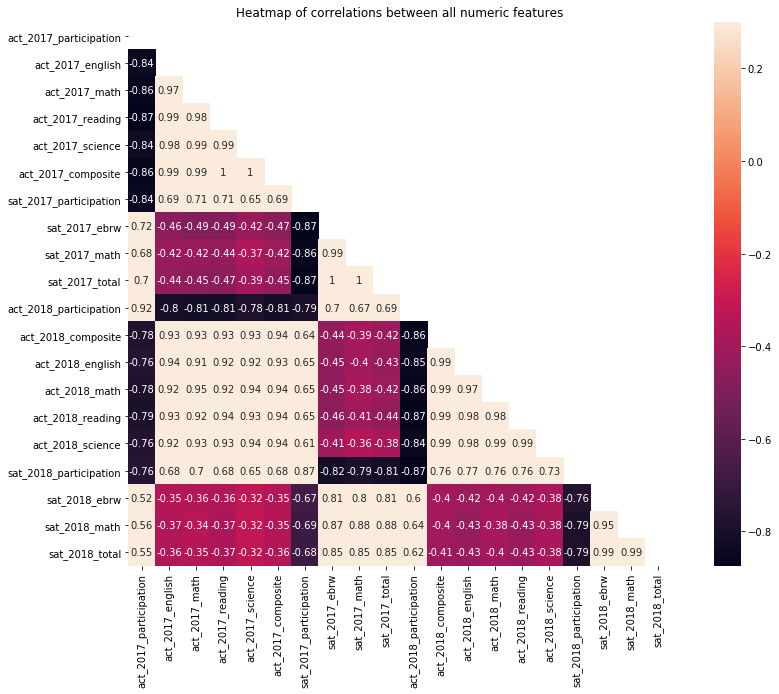

In [125]:
corr = final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
#with sns.axes_style("white"):
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
plt.title('Heatmap of correlations between all numeric features');

In [121]:
# plt.figure(figsize=(16,10))
# sns.heatmap(final.corr(), annot=True)
# plt.title('Heatmap of correlations between all numeric features');

ACT participation rates for both years have a strong negative correlation with ACT scores  
ACT participation rates are negatively correlated to SAT participation rates for both years  
ACT participation rate in year 2017 is strongly positively correlated to ACT participation rate in year 2018  
ACT participation rates in both years are moderately positively correlated to the SAT scores

SAT participation rates are negatively correlated to SAT scores  
SAT participation rates are negatively correlated to ACT participation rates for both years  
SAT participation rate in year 2017 is strongly positively correlated to SAT participation rate in year 2018  
SAT participation rates are moderately positively correlated to ACT scores 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [122]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=13)
    plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

##### Participation rates for SAT & ACT

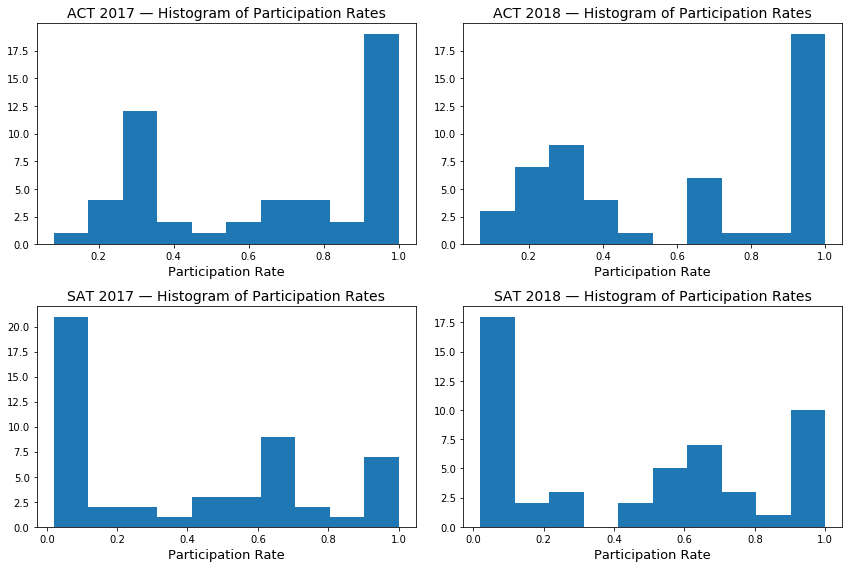

In [123]:
# Code
subplot_histograms(final, 
                   ['act_2017_participation', 'act_2018_participation', 'sat_2017_participation', 'sat_2018_participation'], 
                   ['ACT 2017 \u2014 Histogram of Participation Rates', 'ACT 2018 \u2014 Histogram of Participation Rates', 'SAT 2017 \u2014 Histogram of Participation Rates', 'SAT 2018 \u2014 Histogram of Participation Rates'],
                   ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate'])

**Observation: The participation rates for both ACT and SAT in both years seem to be multimodal, and spread across the domain of 0 and 1.**

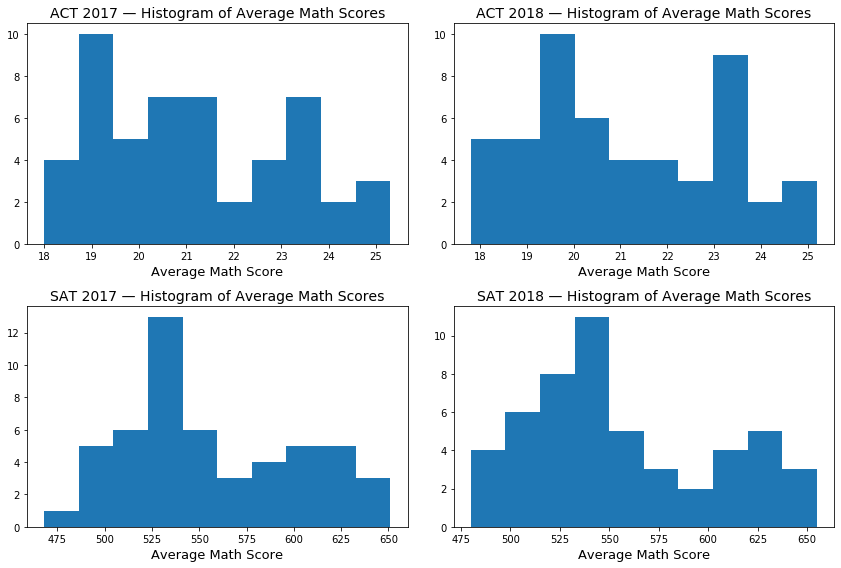

In [124]:
subplot_histograms(final, 
                   ['act_2017_math', 'act_2018_math', 'sat_2017_math', 'sat_2018_math'], 
                   ['ACT 2017 \u2014 Histogram of Average Math Scores', 'ACT 2018 \u2014 Histogram of Average Math Scores', 'SAT 2017 \u2014 Histogram of Average Math Scores', 'SAT 2018 \u2014 Histogram of Average Math Scores'],
                   ['Average Math Score' for i in range(4)])

**Observation:  
The average math scores for both ACT and SAT in both years seem to be multimodal.  
The spread of the Average Math Scores for ACT 2017 is the range from 18 to 25.5.  
The spread of the Average Math Scores for ACT 2018 is the range from 17.5 to 25.5.  
The spread of the Average Math Scores for SAT 2017 is the range from 460 to 650.  
The spread of the Average Math Scores for SAT 2018 is the range from 480 to 660.**

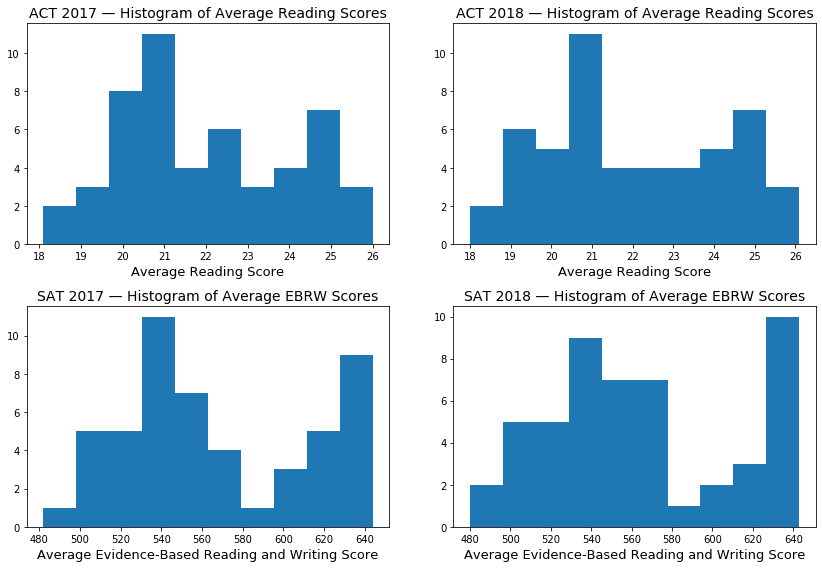

In [125]:
subplot_histograms(final, 
                   ['act_2017_reading', 'act_2018_reading', 'sat_2017_ebrw', 'sat_2018_ebrw'], 
                   ['ACT 2017 \u2014 Histogram of Average Reading Scores', 'ACT 2018 \u2014 Histogram of Average Reading Scores', 'SAT 2017 \u2014 Histogram of Average EBRW Scores', 'SAT 2018 \u2014 Histogram of Average EBRW Scores'],
                   ['Average Reading Score', 'Average Reading Score', 'Average Evidence-Based Reading and Writing Score', 'Average Evidence-Based Reading and Writing Score'])

**Observation:  
The average reading/evidence-based reading and writing scores for both ACT and SAT in both years seem to be multimodal.  
The spread of the Average Reading Scores for ACT 2017 is the range from 18 to 26.  
The spread of the Average Reading Scores for ACT 2018 is the range from 18 to 26.  
The spread of the Average Evidence-Based Reading and Writing Scores for SAT 2017 is the range from 480 to 645.  
The spread of the Average Evidence-Based Reading and Writing Scores for SAT 2018 is the range from 480 to 645.**

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [126]:
# Code
def subplot_scatterplots(dataframe, list_of_column_pairs, list_of_titles, list_of_labels, fig_size):
    num_subplots = len(list_of_column_pairs)
    nrows = int(np.ceil(num_subplots/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=fig_size) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     ax = np.array(ax).reshape(-1) # use this when the configuration is set to 1 row and 1 column

    for i, column_pair in enumerate(list_of_column_pairs):
        x_col, y_col = column_pair
        ax[i].scatter(dataframe[x_col], dataframe[y_col])
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].set_xlabel(list_of_labels[i][0], fontsize=13)
        ax[i].set_ylabel(list_of_labels[i][1], fontsize=13)
    
    plt.tight_layout()
    
    if num_subplots%2 == 1:
        fig.delaxes(ax.flatten()[num_subplots]) 

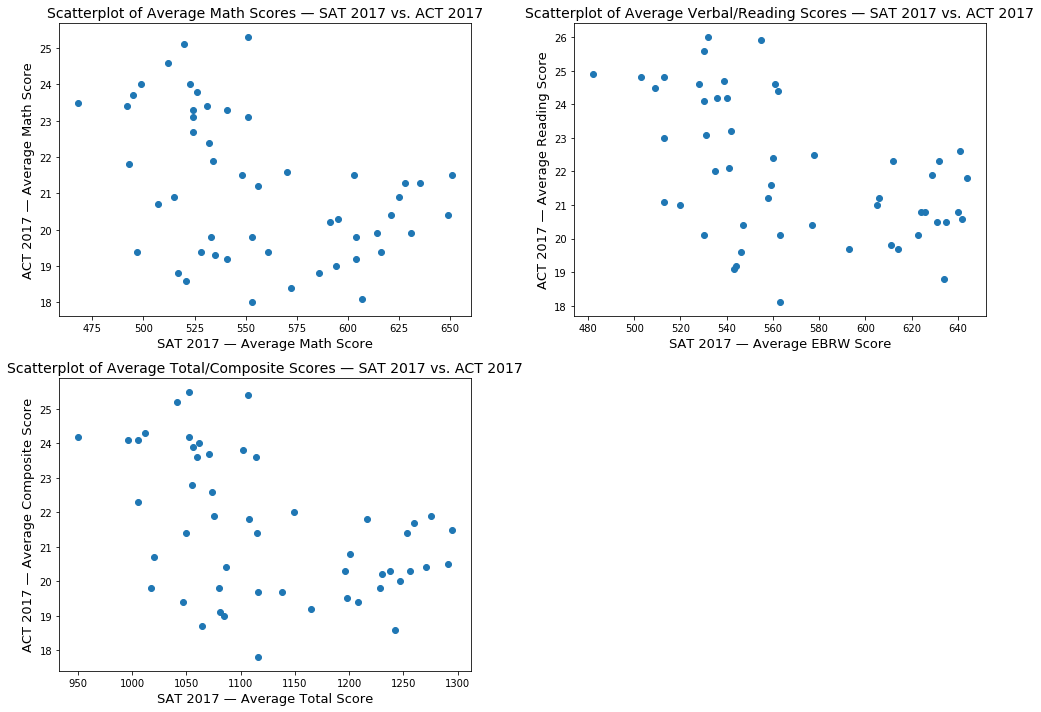

In [127]:
subplot_scatterplots(final,
                    [('sat_2017_math', 'act_2017_math'), 
                     ('sat_2017_ebrw', 'act_2017_reading'),
                     ('sat_2017_total', 'act_2017_composite')],
                    ['Scatterplot of Average Math Scores \u2014 SAT 2017 vs. ACT 2017', 
                     'Scatterplot of Average Verbal/Reading Scores \u2014 SAT 2017 vs. ACT 2017',
                     'Scatterplot of Average Total/Composite Scores \u2014 SAT 2017 vs. ACT 2017'],
                    [('SAT 2017 \u2014 Average Math Score', 'ACT 2017 \u2014 Average Math Score'),
                     ('SAT 2017 \u2014 Average EBRW Score', 'ACT 2017 \u2014 Average Reading Score'),
                     ('SAT 2017 \u2014 Average Total Score', 'ACT 2017 \u2014 Average Composite Score')],
                    (15,10))

**There's a moderate negative correlation between each pair of variables.**

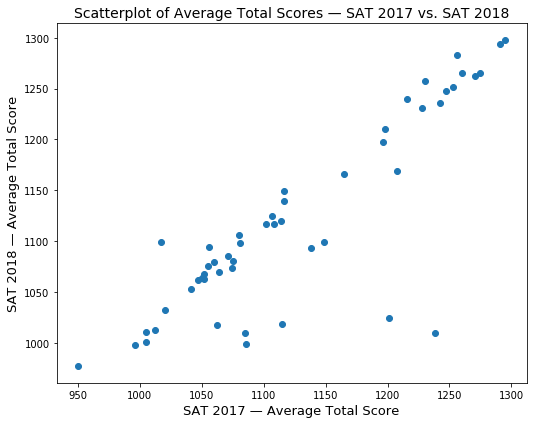

In [128]:
subplot_scatterplots(final,
                    [('sat_2017_total', 'sat_2018_total')],
                    ['Scatterplot of Average Total Scores \u2014 SAT 2017 vs. SAT 2018'],
                    [('SAT 2017 \u2014 Average Total Score', 'SAT 2018 \u2014 Average Total Score')],
                    (15,6))

**There's a strong positive correlation between the Average Total Scores of SAT 2017 and that of SAT 2018**

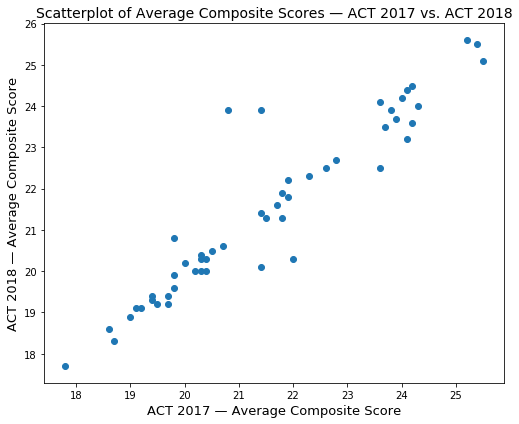

In [129]:
subplot_scatterplots(final,
                    [('act_2017_composite', 'act_2018_composite')],
                    ['Scatterplot of Average Composite Scores \u2014 ACT 2017 vs. ACT 2018'],
                    [('ACT 2017 \u2014 Average Composite Score', 'ACT 2018 \u2014 Average Composite Score')],
                    (15,6))

**There's a strong positive correlation between the Average Composite Scores of ACT 2017 and that of ACT 2018**

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [131]:
act_scores_col = [col for col in final if re.findall('(state|^act_201(7|8).*(?<!participation)$)', col)]
act_2017_scores_col = ['state'] + [col for col in final if re.findall('^act_2017.*(?<!participation)$', col)]
act_2018_scores_col = ['state'] + [col for col in final if re.findall('^act_2018.*(?<!participation)$', col)]

##### Boxplot of ACT 2017 & ACT 2018 Scores

###### Preprocess ACT 2017 Scores

In [132]:
act_2017_scores = final[act_2017_scores_col].copy()

# remove prefix of columns
act_2017_scores.columns = act_2017_scores.columns.map(lambda col: col.replace('act_2017_', ''))

# add years
act_2017_scores = act_2017_scores.assign(year=2017)

###### Preprocess ACT 2018 Scores

In [133]:
act_2018_scores = final[act_2018_scores_col].copy()

# remove prefix of columns
act_2018_scores.columns = act_2018_scores.columns.map(lambda col: col.replace('act_2018_', ''))

# add years
act_2018_scores = act_2018_scores.assign(year=2018)

In [134]:
act_scores = act_2018_scores.append(act_2017_scores, sort=False).reset_index(drop=True).copy()

In [135]:
act_scores['year'] = act_scores['year'].astype('category')

In [136]:
# Code
# sns.boxplot(x="variable", y="value", data=pd.melt(final[[col for col in final if re.findall('^act_2017', col)]]), orient='v')

In [137]:
# https://stackoverflow.com/questions/56838187/how-to-create-spacing-between-same-subgroup-in-seaborn-boxplot
# https://stackoverflow.com/questions/31498850/set-space-between-boxplots-in-python-graphs-generated-nested-box-plots-with-seab


def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [138]:
act_scores_long = pd.melt(act_scores.drop(columns='state'), "year", var_name="Subsections", value_name="Average Scores")

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


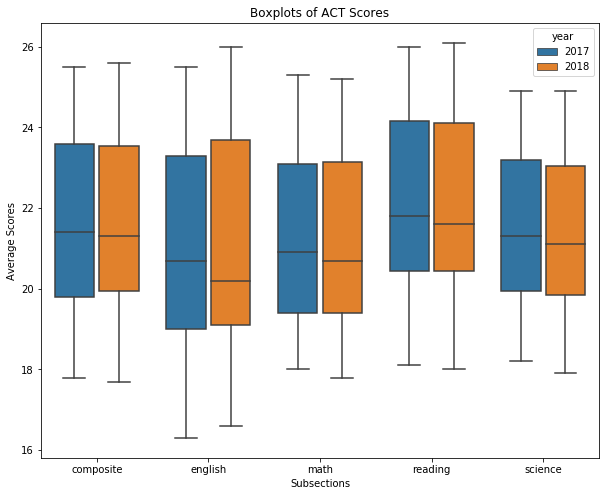

In [139]:
# https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
# https://stackoverflow.com/questions/40241082/in-a-single-figure-boxplot-of-all-columns-split-by-a-label-column

fig = plt.figure(figsize=(10, 8))
sns.boxplot(x="Subsections", hue="year", y="Average Scores", data=act_scores_long)
plt.title('Boxplots of ACT Scores')
adjust_box_widths(fig, 0.9)

The average scores for the english and science sections are distributed over a smaller range of values whereas english, reading, and composite are distributed over a wider range of values

The average scores for all sections are right-skewed where the mean is more than the median

The median of each section do not vary much from 2017 to 2018

##### Boxplot of ACT 2017 & ACT 2018 Participation Rates

In [140]:
# act_2017_participation_col = [col for col in final if re.findall('^act_2017.*participation$' , col)]
act_2017_participation_col = ['state', 'act_2017_participation']
act_2018_participation_col = ['state', 'act_2018_participation']

In [141]:
act_2017_participation = final[act_2017_participation_col].copy()

# remove prefix of columns
act_2017_participation.columns = act_2017_participation.columns.map(lambda col: col.replace('act_2017_', ''))

# add years
act_2017_participation = act_2017_participation.assign(year=2017)

In [142]:
act_2018_participation = final[act_2018_participation_col].copy()

# remove prefix of columns
act_2018_participation.columns = act_2018_participation.columns.map(lambda col: col.replace('act_2018_', ''))

# add years
act_2018_participation = act_2018_participation.assign(year=2018)

In [143]:
act_participation = act_2017_participation.append(act_2018_participation).reset_index(drop=True).copy()

In [144]:
act_participation['year'] = act_participation['year'].astype('category')

In [145]:
act_participation_long = pd.melt(act_participation.drop(columns='state'), "year", var_name="", value_name="Average Participation")

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


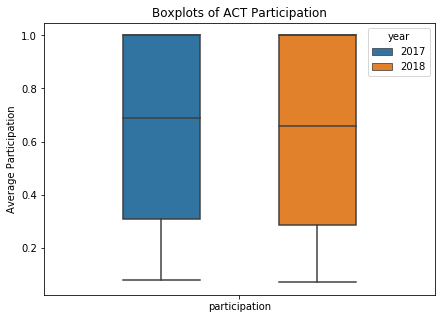

In [146]:
fig = plt.figure(figsize=(7, 5))
sns.boxplot(x="", hue="year", y="Average Participation", data=act_participation_long)
plt.title('Boxplots of ACT Participation')
adjust_box_widths(fig, 0.5)

The median of the ACT Participation did not change by much from year 2017 to year 2018.

###### Boxplots of SAT Section Scores

In [147]:
sat_2017_section_scores_col = ['state'] + [col for col in final if re.findall('^sat_2017.*[^(participation)(total)]$', col)]
sat_2018_section_scores_col = ['state', 'sat_2018_ebrw', 'sat_2018_math']

In [148]:
sat_2017_section_scores = final[sat_2017_section_scores_col].copy()

# remove prefix of columns
sat_2017_section_scores.columns = sat_2017_section_scores.columns.map(lambda col: col.replace('sat_2017_', ''))

# add years
sat_2017_section_scores = sat_2017_section_scores.assign(year=2017)

In [149]:
sat_2018_section_scores = final[sat_2018_section_scores_col].copy()

# remove prefix of columns
sat_2018_section_scores.columns = sat_2018_section_scores.columns.map(lambda col: col.replace('sat_2018_', ''))

# add years
sat_2018_section_scores = sat_2018_section_scores.assign(year=2018)

In [150]:
sat_section_scores = sat_2017_section_scores.append(sat_2018_section_scores).reset_index(drop=True).copy()

In [151]:
sat_section_scores['year'] = sat_section_scores['year'].astype('category')

In [152]:
sat_section_scores_long = pd.melt(sat_section_scores.drop(columns='state'), "year", var_name="Section", value_name="Average Scores")

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


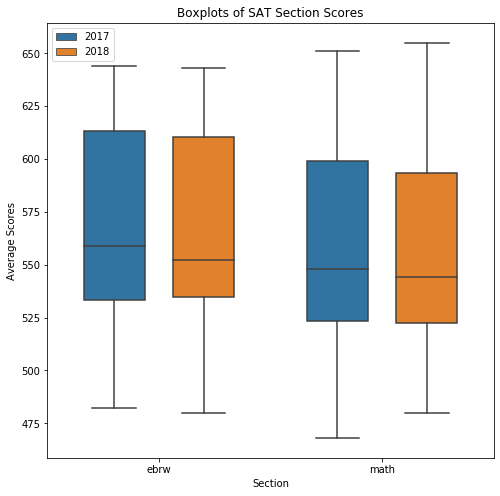

In [153]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(x="Section", hue="year", y="Average Scores", data=sat_section_scores_long)
plt.title('Boxplots of SAT Section Scores')
plt.legend(loc='upper left')
adjust_box_widths(fig, 0.7)

The median for the respective EBRW and Math sections did not change by much from 2017 to 2018.  
It can be observed however that the median decreased and the distribution has become more right skewed.

In [154]:
sat_2017_participation_total = final[['state', 'sat_2017_participation', 'sat_2017_total']].copy()

# remove prefix of columns
sat_2017_participation_total.columns = sat_2017_participation_total.columns.map(lambda col: col.replace('sat_2017_', ''))

# add years
sat_2017_participation_total = sat_2017_participation_total.assign(year=2017)

In [155]:
sat_2018_participation_total = final[['state', 'sat_2018_participation', 'sat_2018_total']].copy()

# remove prefix of columns
sat_2018_participation_total.columns = sat_2018_participation_total.columns.map(lambda col: col.replace('sat_2018_', ''))

# add years
sat_2018_participation_total = sat_2018_participation_total.assign(year=2018)

In [156]:
sat_participation_total = sat_2017_participation_total.append(sat_2018_participation_total).reset_index(drop=True).copy()

In [157]:
sat_participation_total['year'] = sat_participation_total['year'].astype('category')

In [158]:
sat_participation_total

,state,participation,total,year
0,Alabama,0.05,1165,2017
1,Alaska,0.38,1080,2017
2,Arizona,0.30,1116,2017
3,Arkansas,0.03,1208,2017
4,California,0.53,1055,2017
...,...,...,...,...
97,Virginia,0.68,1117,2018
98,Washington,0.69,1081,2018
99,West Virginia,0.28,999,2018
100,Wisconsin,0.03,1294,2018


/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


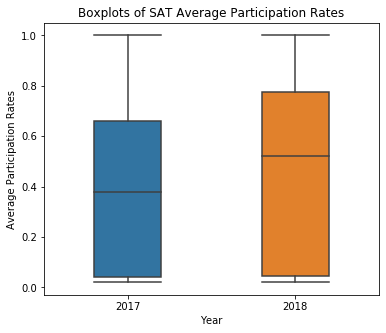

In [159]:
fig = plt.figure(figsize=(6, 5))
sns.boxplot(x="year", y="participation", data=sat_participation_total)
plt.title('Boxplots of SAT Average Participation Rates')
plt.xlabel('Year')
plt.ylabel('Average Participation Rates')
adjust_box_widths(fig, 0.5)

The median of the average participation rates increased from 2017 to 2018.  
The average participation rates became more left skewed in 2018 compared to 2017.

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


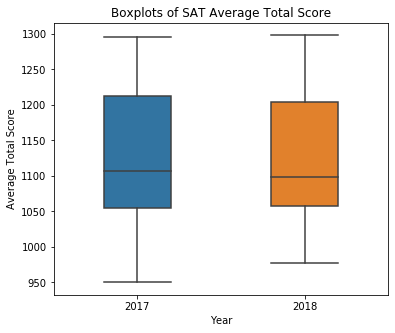

In [160]:
fig = plt.figure(figsize=(6, 5))
sns.boxplot(x="year", y="total", data=sat_participation_total)
plt.title('Boxplots of SAT Average Total Score')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
adjust_box_widths(fig, 0.5)

The variance between the average total scores for the SAT decreased in 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [210]:
# Code
def subplot_scatterplots_conditional(dataframe, list_of_column_pairs, list_of_titles, list_of_labels, fig_size, title):
    num_subplots = len(list_of_column_pairs)
    nrows = int(np.ceil(num_subplots/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=fig_size) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     ax = np.array(ax).reshape(-1) # use this when the configuration is set to 1 row and 1 column
    
    colors = {2017:'blue', 2018:'orange'}
    

    z = randn(10)
    legend_elements = [
                   Line2D([0], [0], linewidth=0, marker='o', color='blue', label='2017',
                          markerfacecolor='blue', markersize=6),
                   Line2D([0], [0], linewidth=0, marker='o', color='orange', label='2018',
                          markerfacecolor='orange', markersize=6)
    ]
    
    
    for i, column_pair in enumerate(list_of_column_pairs):
        x_col, y_col = column_pair
                
        scatter = ax[i].scatter(dataframe[x_col], 
                      dataframe[y_col], 
                      c=dataframe['year'].apply(lambda x: colors[x]))
        # Set titles, labels, etc here for each subplot
#         ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].set_xlabel(list_of_labels[i][0], fontsize=13)
        ax[i].set_ylabel(list_of_labels[i][1], fontsize=13)
        ax[i].legend(handles=legend_elements)
    
    if num_subplots < 2:
        ax[0].set_title(title)
    else:
        plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    
    if num_subplots%2 == 1:
        fig.delaxes(ax.flatten()[num_subplots]) 

In [211]:
# Plot participation of each test against each respective tests scores
act_combined = pd.concat([act_scores, act_participation.drop(columns=['state', 'year'])], axis=1)
act_combined.shape

(102, 8)

In [212]:
act_combined.columns

Index(['state', 'composite', 'english', 'math', 'reading', 'science', 'year',
       'participation'],
      dtype='object')

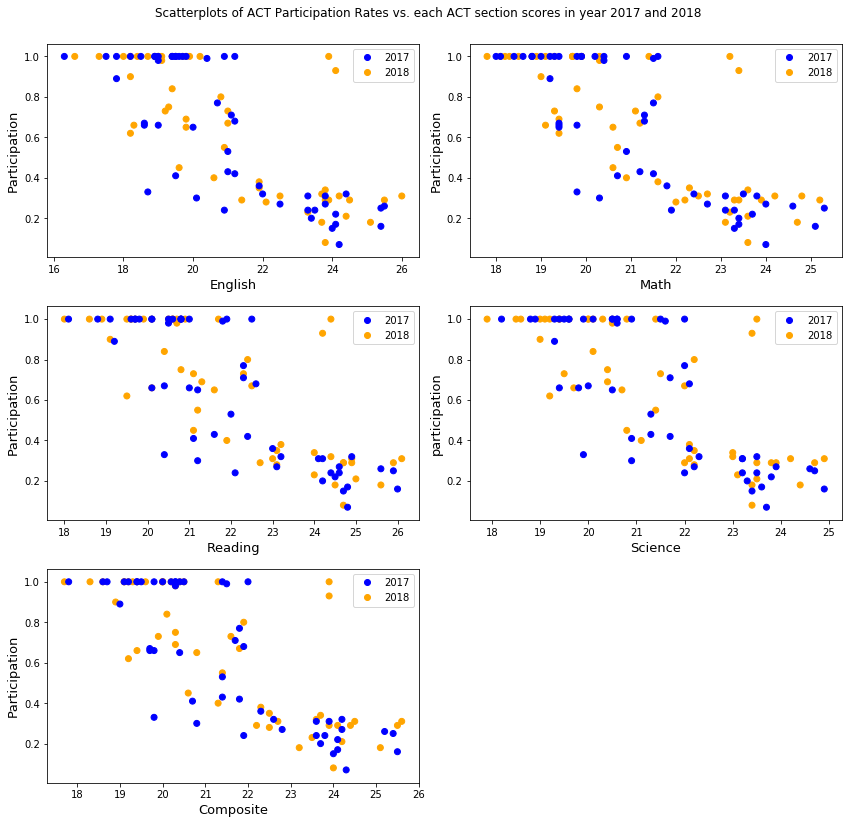

In [213]:
subplot_scatterplots_conditional(act_combined, 
                         [('english', 'participation'), 
                          ('math', 'participation'), 
                          ('reading', 'participation'),
                          ('science', 'participation'),
                          ('composite', 'participation')], 
                         ['', '', '', '', ''], 
                         [('English', 'Participation'), 
                          ('Math', 'Participation'), 
                          ('Reading', 'Participation'),
                          ('Science', 'participation'),
                          ('Composite', 'Participation')], 
                         (12,12),
                        "Scatterplots of ACT Participation Rates vs. each ACT section scores in year 2017 and 2018")

Findings: There is a moderate negative correlation between the participation rates for the ACT and the scores for each section of the ACT. A possible explanation for this correlation may be due to less academically inclined students being compelled to take the ACT, boosting participation rates and at the same time, contributing to a lower mean score.

In [187]:
# sns.lmplot( x="english", y="participation", data=act_combined, fit_reg=False, hue='year', legend=False)

# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')

In [196]:
sat_combined = pd.concat([sat_section_scores, sat_participation_total.drop(columns=['state', 'year'])], axis=1)
sat_combined.shape

(102, 6)

In [197]:
sat_combined.columns

Index(['state', 'ebrw', 'math', 'year', 'participation', 'total'], dtype='object')

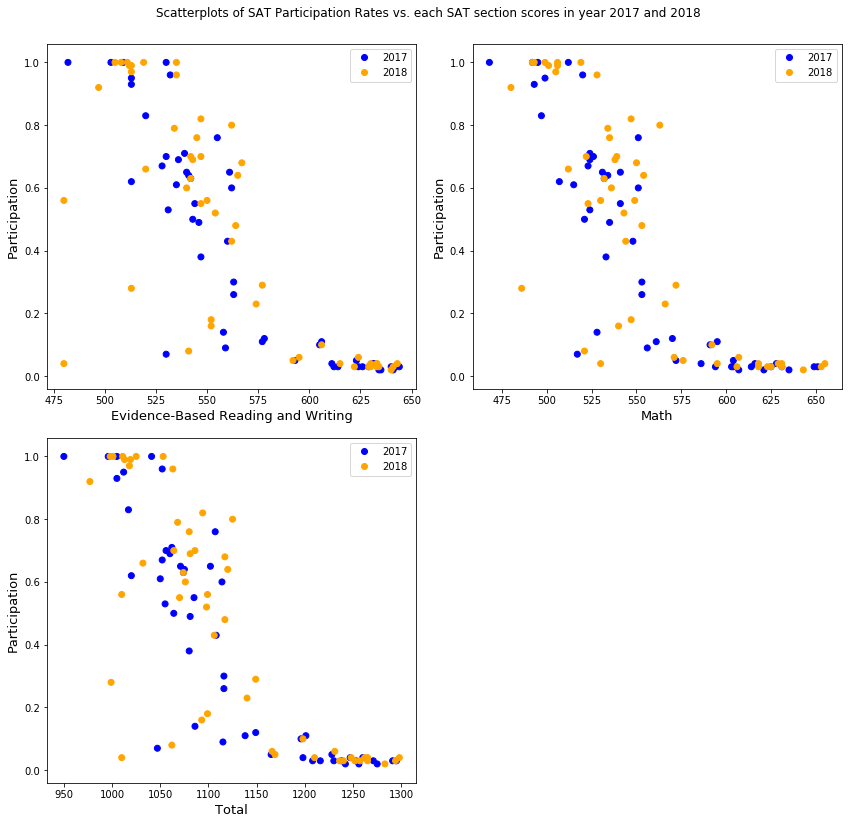

In [214]:
subplot_scatterplots_conditional(sat_combined, 
                         [('ebrw', 'participation'), 
                          ('math', 'participation'), 
                          ('total', 'participation')], 
                         ['', '', ''], 
                         [('Evidence-Based Reading and Writing', 'Participation'), 
                          ('Math', 'Participation'), 
                          ('Total', 'Participation')], 
                         (12,12),
                        "Scatterplots of SAT Participation Rates vs. each SAT section scores in year 2017 and 2018")

Findings: There is a strong negative correlation between the participation rates for the SAT and the scores for each section of the SAT. A possible explanation for this correlation may be due to less academically inclined students being compelled to take the SAT, boosting participation rates and at the same time, contributing to a lower mean score.

In [202]:
sat_combined

,state,ebrw,math,year,participation,total
0,Alabama,593,572,2017,0.05,1165
1,Alaska,547,533,2017,0.38,1080
2,Arizona,563,553,2017,0.30,1116
3,Arkansas,614,594,2017,0.03,1208
4,California,531,524,2017,0.53,1055
...,...,...,...,...,...,...
97,Virginia,567,550,2018,0.68,1117
98,Washington,543,538,2018,0.69,1081
99,West Virginia,513,486,2018,0.28,999
100,Wisconsin,641,653,2018,0.03,1294


In [205]:
sat_act_participation_combined = pd.concat(
    [sat_combined[['state', 'participation', 'year']].copy().rename(columns={'state':'state', 'participation': 'sat_participation', 'year':'year'}),
    act_combined[['participation']].copy().rename(columns={'participation': 'act_participation'})], axis=1)

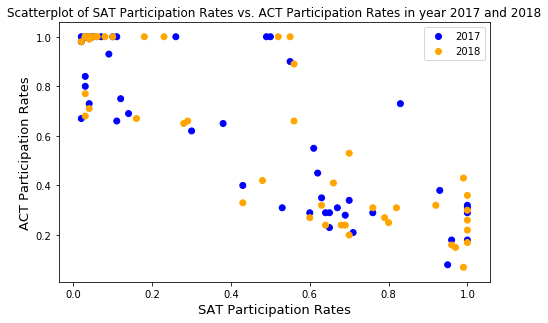

In [217]:
subplot_scatterplots_conditional(sat_act_participation_combined, 
                         [('sat_participation', 'act_participation')], 
                         [''], 
                         [('SAT Participation Rates', 'ACT Participation Rates')], 
                         (15,5),
                        "Scatterplot of SAT Participation Rates vs. ACT Participation Rates in year 2017 and 2018")

Findings: The participation rates of the SAT are moderately negatively correlated with the participation rates of the ACT for both years. A possible explanation would be that each high-schooler takes either the SAT or the ACT test but not both. Therefore, a high participation rate in one test would result in a low participation rate in the other, and vice-versa.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [236]:
# Reference: https://stackoverflow.com/questions/38545828/pandas-describe-by-additional-parameters
def modified_describe(df):
#     d = df.describe()
#     return d.append(df.reindex(d.columns, 1).agg(stats))
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

modified_describe(final)

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,643.000000,655.000000,1298.000000
skew,-0.197989,0.352660,0.332683,0.269366,0.218823,0.319810,0.346450,0.272693,0.365040,0.310903,-0.021916,0.281962,0.371507,0.269548,0.201361,0.172383,0.136228,0.282300,0.530407,0.466432
kurt,-1.631970,-0.879307,-0.979210,-0.982094,-0.956033,-0.983524,-1.380695,-1.220371,-0.925843,-1.105461,-1.738681,-1.080666,-1.071710,-1.109059,-1.116031,-1.109301,-1.569003,-1.055118,-0.756126,-1.022725


*O
act_2017_participation is distributed with mean of 0.653 and standard deviation of 0.321 and is left-skewed (negative skewness value of -0.198). As its kurtosis is less than zero, the distribution is light tails and is a platykurtic distribution. [Reference](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#kurtosis)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. The kurtosis values for each and every numeric variable is far from 0, hence we cannot assume a normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Inferential statistics performed on each variable will not be accurate as they depend on the assumption of normality.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Population <html>&mdash;</html> the participation rate for the ACT/SAT in the U.S. in 2017

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: The content tested in the SAT and that tested in the ACT may not overlap entirely and hence it would not be appropriate to make a direct comparison between the math sections of both tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [245]:
stats.ttest_ind(final['act_2018_participation'], final['act_2017_participation'], equal_var=False)

Ttest_indResult(statistic=-0.5499970052081805, pvalue=0.5835519913078013)

Given that the p-value is > the alpha value of 0.05, do not reject the null hypothesis that the mean of the ACT mean participation rate in 2017 equals to the mean of the ACT mean participation rate in 2018 and conclude that there is insufficient evidence to conclude that they are different.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

*Research Findings* 

<ins>Connecticut</ins> has 100% SAT participation rates for both 2017 and 2018 due to a mandate for all 11th graders in the state’s public schools to take the SAT college admissions tests, replacing an existing statewide exam. [Connecticut to Require All 11th Graders to Take the SAT](https://www.nytimes.com/2015/08/07/nyregion/connecticut-to-require-all-11th-graders-to-take-the-sat.html)  
However, Connecticut does not come in first place for the highest average total score for the SAT in both years, probably because students who are not academically inclined contribute to the score.

<u>Alabama</u> has the highest participation rate for 2 years running most probably because the state of Alabama pays for the ACT and makes it mandatory that high schoolers take the ACT

<u>Minnesota</u> has the highest average total score for 2 years running. This pattern may be due to the fact that the state of Minnesota does not pay for nor mandates the ACT and SAT for high schoolers, in turn leading to more academically-inclined and studious candidates taking the test in the state of Minnesota, driving up the average total scores.

(https://www.princetonreview.com/college-advice/act-sat-state-requirements)

<table cellspacing="0" cellpadding="0" style="float:left">
<thead>
        <tr style="height:20px;">
            <th id="0R0" style="height: 20px;" class="row-headers-background row-header-shim">
                <div class="row-header-wrapper" style="line-height: 20px;"></div>
                <th class="s0" dir="ltr">State</th>
            <th class="s0" dir="ltr">Requires SAT</th>
            <th class="s0" dir="ltr">Requires ACT</th>
            <th class="s0" dir="ltr">Requires Either</th>
            <th class="s0" dir="ltr">Pays for SAT</th>
            <th class="s0" dir="ltr">Pays for ACT</th>
    </tr>
    </thead>
    <tbody>
        <tr style="height:20px;"><th id="0R1" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">1</div></th><td class="s0" dir="ltr">Alabama</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R2" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">2</div></th><td class="s0" dir="ltr">Alaska</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R3" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">3</div></th><td class="s0" dir="ltr">Arizona</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R4" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">4</div></th><td class="s0" dir="ltr">Arkansas</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R5" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">5</div></th><td class="s0" dir="ltr">California</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R6" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">6</div></th><td class="s0" dir="ltr">Colorado</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R7" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">7</div></th><td class="s0" dir="ltr">Connecticut</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R8" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">8</div></th><td class="s0" dir="ltr">DC</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R9" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">9</div></th><td class="s0" dir="ltr">Delaware</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R10" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">10</div></th><td class="s0" dir="ltr">Florida</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R11" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">11</div></th><td class="s0" dir="ltr">Georgia</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R12" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">12</div></th><td class="s0" dir="ltr">Hawaii</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R13" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">13</div></th><td class="s0" dir="ltr">Idaho</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R14" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">14</div></th><td class="s0" dir="ltr">Illinois</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R15" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">15</div></th><td class="s0" dir="ltr">Indiana</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R16" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">16</div></th><td class="s0" dir="ltr">Iowa</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R17" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">17</div></th><td class="s0" dir="ltr">Kansas</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R18" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">18</div></th><td class="s0" dir="ltr">Kentucky</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R19" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">19</div></th><td class="s0" dir="ltr">Louisiana</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R20" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">20</div></th><td class="s0" dir="ltr">Maine</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R21" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">21</div></th><td class="s0" dir="ltr">Maryland</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R22" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">22</div></th><td class="s0" dir="ltr">Michigan</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R23" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">23</div></th><td class="s0" dir="ltr">Minnesota</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R24" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">24</div></th><td class="s0" dir="ltr">Mississippi</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R25" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">25</div></th><td class="s0" dir="ltr">Missouri</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R26" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">26</div></th><td class="s0" dir="ltr">Montana</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R27" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">27</div></th><td class="s0" dir="ltr">Nebraska</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R28" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">28</div></th><td class="s0" dir="ltr">Nevada</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R29" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">29</div></th><td class="s0 softmerge" dir="ltr"><div class="softmerge-inner" style="width: 97px; left: -1px;">New Hampshire</div></td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R30" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">30</div></th><td class="s0" dir="ltr">New Jersey</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R31" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">31</div></th><td class="s0" dir="ltr">New Mexico</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R32" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">32</div></th><td class="s0" dir="ltr">New York</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R33" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">33</div></th><td class="s0" dir="ltr">North Carolina</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R34" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">34</div></th><td class="s0" dir="ltr">North Dakota</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R35" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">35</div></th><td class="s0" dir="ltr">Ohio</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R36" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">36</div></th><td class="s0" dir="ltr">Oklahoma</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R37" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">37</div></th><td class="s0" dir="ltr">Oregon</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R38" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">38</div></th><td class="s0" dir="ltr">Pennsylvania</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R39" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">39</div></th><td class="s0" dir="ltr">Rhode Island</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R40" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">40</div></th><td class="s0" dir="ltr">South Carolina</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R41" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">41</div></th><td class="s0" dir="ltr">South Dakota</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R42" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">42</div></th><td class="s0" dir="ltr">Tennessee</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R43" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">43</div></th><td class="s0" dir="ltr">Texas</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R44" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">44</div></th><td class="s0" dir="ltr">Utah</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R45" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">45</div></th><td class="s0" dir="ltr">Vermont</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R46" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">46</div></th><td class="s0" dir="ltr">Virginia</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R47" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">47</div></th><td class="s0" dir="ltr">Washington</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R48" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">48</div></th><td class="s0" dir="ltr">West Virginia</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">No</td></tr><tr style="height:20px;"><th id="0R49" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">49</div></th><td class="s0" dir="ltr">Wisconsin</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr><tr style="height:20px;"><th id="0R50" style="height: 20px;" class="row-headers-background row-header-shim"><div class="row-header-wrapper" style="line-height: 20px;">50</div></th><td class="s0" dir="ltr">Wyoming</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td><td class="s0" dir="ltr">n/a</td><td class="s0" dir="ltr">No</td><td class="s0" dir="ltr">Yes</td></tr></tbody>
</table>


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

*Answer*

Although the participation rates of either test are negatively correlated with each of the scores of the respective test's section, it does not suggest a causal relationship between these pairs of variables, specifically, reducing the scores by making the test more difficult for example would not necessarily result in an increase in the participation rates.

Given that the participation rates are highest in states where the SAT is mandatory and paid for, the College Board could lobby the state government of North Dakota, which has the lowest SAT participation rates for both years and does not mandate either the ACT or SAT nor pays for either tests, to adopt the SAT as the state's compulsory examination for high-schoolers and perhaps even sponsor the test.  

Additional data such as the universities within each state and the ranking of the universities throughout the U.S. might provide additional insight into the participation rate of either test as there may be individuals who take one test over the other with the intention of entering his/her desired college which may require either the SAT or the ACT. 